In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import joblib

In [135]:

warnings.filterwarnings('ignore')

In [136]:
df = pd.read_csv(r"/content/sample_data/Restaurant_Reviews.tsv",sep='\t')


In [137]:

df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [138]:
df.shape

(1000, 2)

In [139]:
df.isnull().sum()

,0
Review,0
Liked,0


In [140]:
df['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [141]:
df['Review'][0]

'Wow... Loved this place.'

In [142]:
 # Creates a new column 'char_count' in the dataframe 'df' that stores the length of each review in the 'Review' column.
df['char_count']=df['Review'].apply(len)

In [143]:
df.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [144]:
# Creates a new column 'word_count' in the dataframe 'data' that stores the number of words in each review in the 'Review' column.
data['word_count']=data['Review'].apply(lambda x :len(str(x).split()))

In [145]:
df.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [146]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [147]:
# Creates a new column 'sent_count' in the dataframe 'df' that stores the number of sentences in each review in the 'Review' column.
df['sent_count']=df['Review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))

In [148]:
df.head()

,Review,Liked,char_count,sent_count
0,Wow... Loved this place.,1,24,2
1,Crust is not good.,0,18,1
2,Not tasty and the texture was just nasty.,0,41,1
3,Stopped by during the late May bank holiday of...,1,87,1
4,The selection on the menu was great and so wer...,1,59,1


In [149]:
df[df['Liked']==1]['char_count'].mean()

np.float64(55.88)

In [150]:
df[df['Liked']==0]['char_count'].mean()

np.float64(60.75)

In [151]:
import re



In [152]:
df['Review'][1]

'Crust is not good.'

In [153]:
# Removes all characters except English letters from the review at index 1 of the 'Review' column in the 'data' dataframe, replacing them with spaces.
review = re.sub('[^a-zA-Z]',' ',df['Review'][1])

In [154]:
review

'Crust is not good '

In [155]:
review = review.lower()

In [156]:
review

'crust is not good '

In [157]:
review = review.split()

In [158]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [159]:
from nltk.corpus import stopwords

In [160]:
all_stopwords = stopwords.words("english")
all_stopwords.remove('not')

In [161]:

all_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'o

In [162]:
review = [word for word in review if word not in set(all_stopwords)]

In [163]:
review

['crust', 'not', 'good']

In [164]:
from nltk.stem.porter import PorterStemmer

In [165]:
ps = PorterStemmer()

In [166]:
review = [ps.stem(word) for word in review]

In [167]:

review = " ".join(review)

In [168]:
review

'crust not good'

In [169]:
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

corpus =[]
ps =PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [170]:
df['processed_text']=corpus

In [171]:
df.head(3)

,Review,Liked,char_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,2,wow love place
1,Crust is not good.,0,18,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,1,not tasti textur nasti


In [172]:
from wordcloud import WordCloud

In [173]:
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")

In [174]:
pos = wc.generate(df[df['Liked']==1]['processed_text'].str.cat(sep=" "))

In [175]:
pos

In [176]:
neg = wc.generate(df[df['Liked']==0]['processed_text'].str.cat(sep=" "))

In [177]:
neg

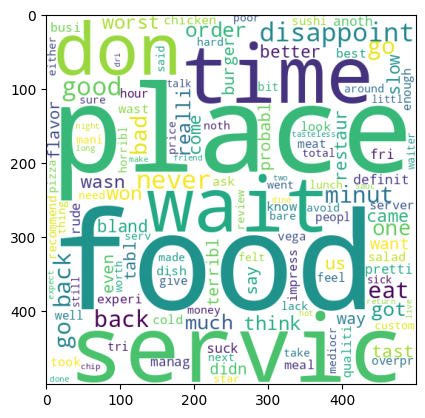

In [178]:
plt.imshow(pos)

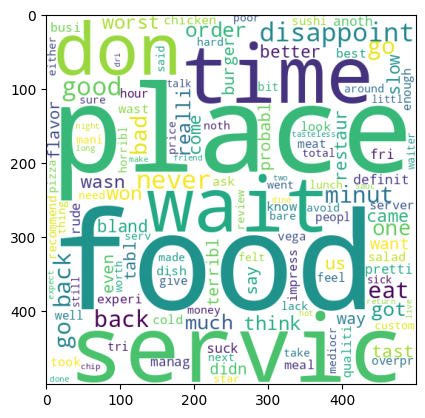

In [179]:
plt.imshow(neg)

In [180]:
data.head()

,Review,Liked,word_count
0,Wow... Loved this place.,1,4
1,Crust is not good.,0,4
2,Not tasty and the texture was just nasty.,0,8
3,Stopped by during the late May bank holiday of...,1,15
4,The selection on the menu was great and so wer...,1,12


In [181]:
from sklearn.feature_extraction.text import CountVectorizer

In [182]:
cv = CountVectorizer(max_features=1500)

In [183]:
X = cv.fit_transform(corpus).toarray()

In [184]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [185]:
X.shape

(1000, 1500)

In [186]:
joblib.dump(cv,"count_v_res")

['count_v_res']

In [187]:
y = data['Liked']

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [190]:
from sklearn.naive_bayes import GaussianNB

In [191]:
nb =GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [192]:
from sklearn.metrics import accuracy_score

In [193]:
accuracy_score(y_test,y_pred)

0.68

In [195]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.795

In [196]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.805

In [197]:
import joblib

In [198]:
joblib.dump(rf,'Restaurant_review_model')


['Restaurant_review_model']

In [199]:
import tkinter as tk
from tkinter import ttk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re

class RestaurantReviewApp:
    def __init__(self, master):
        self.master = master
        master.title("Restaurant Review Classification App")
        master.geometry("400x300")  # Set a custom size for the window

        # Load your pre-trained Random Forest model and CountVectorizer
        # Replace 'your_model.pkl' and 'your_vectorizer.pkl' with the actual filenames
        self.model = joblib.load('Restaurant_review_model')
        self.vectorizer = joblib.load('count_v_res')

        # Create and set up widgets
        title_font = ('Helvetica', 16, 'bold')  # Larger font for the title
        self.label = ttk.Label(master, text="Enter your restaurant review:", font=title_font)
        self.label.pack(pady=10)

        self.text_entry = tk.Text(master, height=5, width=40)
        self.text_entry.pack(pady=10)

        # Increase button size and change color on press
        self.classify_button = ttk.Button(master, text="Classify", command=self.classify_review, style='Custom.TButton')
        self.classify_button.pack(pady=10)

        self.result_label = ttk.Label(master, text="")
        self.result_label.pack(pady=10)

        # Style configuration for the button
        self.style = ttk.Style()
        self.style.configure('Custom.TButton', font=('Helvetica', 12), width=15, foreground='black', background='#4CAF50', padding=(10, 5))
        self.style.map('Custom.TButton', foreground=[('pressed', 'black'), ('active', 'white')], background=[('pressed', '!disabled', '#45a049'), ('active', '#4CAF50')])

    def preprocess_text(self, text):
        custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                            'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                            'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                            'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
        ps = PorterStemmer()
        stop_words = set(stopwords.words("english")) - custom_stopwords

        review = re.sub('[^a-zA-Z]', ' ', text)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        review = " ".join(review)

        return review

    def classify_review(self):
        user_input = self.text_entry.get("1.0", "end-1c")
        if user_input:
            processed_input = self.preprocess_text(user_input)
            # Transform the processed_input using the CountVectorizer
            processed_input_vectorized = self.vectorizer.transform([processed_input])
            prediction = self.model.predict(processed_input_vectorized)[0]
            sentiment = "Positive" if prediction == 1 else "Negative"
            self.result_label.config(text=f"Predicted Sentiment: {sentiment}")
        else:
            self.result_label.config(text="Please enter a review before clicking 'Classify'.")

if __name__ == "__main__":
    root = tk.Tk()
    app = RestaurantReviewApp(root)
    root.mainloop()

TclError: no display name and no $DISPLAY environment variable

In [203]:
!pip install gradio -q



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


In [205]:
import gradio as gr
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary NLTK data if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')


# Load your pre-trained Random Forest model and CountVectorizer
# Make sure the filenames 'Restaurant_review_model' and 'count_v_res' are correct
try:
    model = joblib.load('Restaurant_review_model')
    vectorizer = joblib.load('count_v_res')
    print("Model and Vectorizer loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading model or vectorizer: {e}")
    print("Please ensure 'Restaurant_review_model' and 'count_v_res' files exist in the correct directory.")
    # You might want to exit or handle this error more gracefully
    # For a Gradio app, you might display an error message in the UI

def preprocess_text(text):
    custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                        'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                        'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                        'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                        'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
    ps = PorterStemmer()
    # Ensure stopwords are loaded before using them
    try:
         stop_words = set(stopwords.words("english")) - custom_stopwords
    except LookupError:
         print("NLTK stopwords not found. Downloading now.")
         nltk.download('stopwords')
         stop_words = set(stopwords.words("english")) - custom_stopwords


    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)

    return review

def classify_review_gradio(text):
    if not text:
        return "Please enter a review."
    if 'model' not in globals() or 'vectorizer' not in globals():
         return "Model or vectorizer not loaded. Cannot classify."

    processed_input = preprocess_text(text)
    processed_input_vectorized = vectorizer.transform([processed_input])
    prediction = model.predict(processed_input_vectorized)[0]
    sentiment = "Positive" if prediction == 1 else "Negative"
    return f"Predicted Sentiment: {sentiment}"

# Create the Gradio interface
if 'model' in globals() and 'vectorizer' in globals():
    interface = gr.Interface(
        fn=classify_review_gradio,
        inputs=gr.Textbox(lines=5, label="Enter your restaurant review:"),
        outputs=gr.Textbox(label="Classification Result:"),
        title="Restaurant Review Sentiment Classifier",
        description="Enter a restaurant review to classify its sentiment as Positive or Negative."
    )

    # Launch the interface
    interface.launch(share=True) # share=True creates a public link
else:
    print("Cannot launch Gradio interface as model or vectorizer failed to load.")

Model and Vectorizer loaded successfully.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://deaa6bef037b935f9f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
